## Preambule

In [9]:
import numpy as np
from tqdm import tqdm
from importlib import reload
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import scipy
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Run class

In [18]:
import class_exports
reload(class_exports)
from class_exports import dataexportcl

dataexporter = dataexportcl()
dataexporter.global_all()
dataexporter.negative_nonlulucf_emissions()
# dataexporter.global_default()
# dataexporter.ndcdata()
# dataexporter.sspdata()
# dataexporter.emisdata()
# dataexporter.reduce_country_files()
# dataexporter.allocations_default()
# dataexporter.project_COMMITTED()
# dataexporter.project_DGIS()
# dataexporter.co2_budgets_pc(lulucf='incl')
# dataexporter.co2_budgets_ap(lulucf='incl')
# dataexporter.co2_budgets_ecpc(lulucf='incl')
# dataexporter.concat_co2budgets(lulucf='incl')
# for lulucf in ['excl', 'incl']:
#     for adapt in ['_adapt', '']:
#         for gas in ['CO2', 'GHG']:
#             dataexporter.countr_to_csv('NOR', adapt=adapt, lulucf=lulucf, gas=gas)

# ==================================== #
# DATAREADING class                    #
# startyear:  2021
# ==================================== #


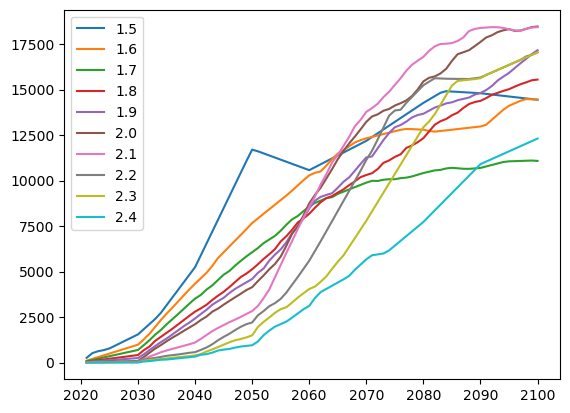

In [27]:
for t in dataexporter.xr_dataread.Temperature:
    plt.plot(dataexporter.xr_dataread.Time, dataexporter.xr_dataread.CO2_neg_globe.sel(Temperature=t, NegEmis=0.5), label=float(t))
plt.legend()

## Compress into ZIP folders for Zenodo

In [11]:
import zipfile

mydir = "K:/data/EffortSharingExports/"

# Allocations.zip
zip = zipfile.ZipFile(mydir+"ZIPs/"+"Allocations.zip", "w", zipfile.ZIP_DEFLATED)
for reg in np.array(dataexporter.xr_dataread.Region):
    zip.write(mydir+"Allocations/allocations_" + reg + ".nc")
zip.close()

# DefaultAllocations.zip
zip = zipfile.ZipFile(mydir+"ZIPs/"+"DefaultAllocations.zip", "w", zipfile.ZIP_DEFLATED)
zip.write(mydir+"allocations_default_15overshoot.csv")
zip.write(mydir+"allocations_default_20.csv")
zip.close()

# DefaultReductions.zip
zip = zipfile.ZipFile(mydir+"ZIPs/"+"DefaultReductions.zip", "w", zipfile.ZIP_DEFLATED)
zip.write(mydir+"reductions_default_15overshoot.csv")
zip.write(mydir+"reductions_default_20.csv")
zip.close()

# GlobalPathways.zip
zip = zipfile.ZipFile(mydir+"ZIPs/"+"GlobalPathways.zip", "w", zipfile.ZIP_DEFLATED)
zip.write(mydir+"emissionspathways_all.csv")
zip.write(mydir+"emissionspathways_default.csv")
zip.close()

# GlobalPathways.zip
zip = zipfile.ZipFile(mydir+"ZIPs/"+"Inputdata.zip", "w", zipfile.ZIP_DEFLATED)
zip.write(mydir+"inputdata_histemis.csv")
zip.write(mydir+"inputdata_ndc.csv")
zip.write(mydir+"inputdata_ssp.csv")
zip.close()